### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

### Loading training data

In [2]:
train_data = pd.read_csv('train.csv')

### Loading test data

In [3]:
test_data = pd.read_csv('test.csv')

### Top 5 rows - train data

In [4]:
train_data.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2
2,ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1


### Top 5 rows - test data

In [5]:
test_data.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2
0,ANSL_75005,2005-08-17 00:00:00,2017-09-07 15:35:00,0.0,Black,0.87,42.73,0,7
1,ANSL_76663,2018-11-15 00:00:00,2019-05-08 17:24:00,1.0,Orange Tabby,0.06,6.71,0,1
2,ANSL_58259,2012-10-11 00:00:00,2018-04-02 16:51:00,1.0,Black,0.24,41.21,0,7
3,ANSL_67171,2015-02-13 00:00:00,2018-04-06 07:25:00,1.0,Black,0.29,8.46,7,1
4,ANSL_72871,2017-01-18 00:00:00,2018-04-26 13:42:00,1.0,Brown,0.71,30.92,0,7


### Train data shape

In [6]:
train_data.shape

(18834, 11)

### Test data shape

In [7]:
test_data.shape

(8072, 9)

### Seprating dependent and Independent Variables

In [54]:
x_train = train_data.drop(['pet_category', 'breed_category'], axis=1)
y_train_pet = train_data['pet_category']
y_train_breed = train_data['breed_category']

### Dropping non-important features

In [13]:
x_train.drop(['pet_id','issue_date','listing_date'], inplace=True, axis=1)

In [14]:
x_test = test_data.drop(['pet_id','issue_date','listing_date'], axis=1)

### Checking null values

In [17]:
x_train.isnull().sum()

condition     1477
color_type       0
length(m)        0
height(cm)       0
X1               0
X2               0
dtype: int64

In [18]:
x_test.isnull().sum()

condition     619
color_type      0
length(m)       0
height(cm)      0
X1              0
X2              0
dtype: int64

### Replacing null values with the most frequent values

In [19]:
x_test['condition'] = x_test['condition'].fillna(x_test['condition'].mode()[0])

In [20]:
x_train['condition'] = x_train['condition'].fillna(x_train['condition'].mode()[0])

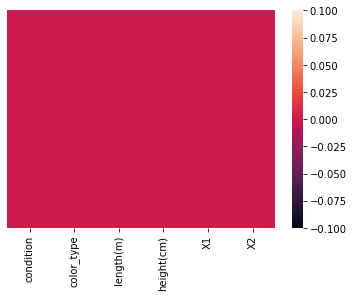

In [22]:
sns.heatmap(x_train.isnull(), yticklabels=False)
plt.show()

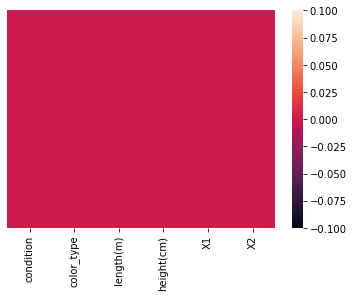

In [23]:
sns.heatmap(x_test.isnull(), yticklabels=False)
plt.show()

## Data Preparation

In [24]:
dummy_train = pd.get_dummies(x_train)
dummy_test = pd.get_dummies(x_test)

In [25]:
dummy_train = dummy_train.reindex(columns=x_train.columns, fill_value=0)

In [26]:
dummy_train.head()

,condition,color_type,length(m),height(cm),X1,X2
0,2.0,0,0.80,7.78,13,9
1,1.0,0,0.72,14.19,13,9
2,1.0,0,0.15,40.90,15,4
3,1.0,0,0.62,17.82,0,1
4,2.0,0,0.50,11.06,18,4


In [27]:
dummy_test = dummy_test.reindex(columns=dummy_train.columns, fill_value=0)

In [28]:
dummy_test.head()

,condition,color_type,length(m),height(cm),X1,X2
0,0.0,0,0.87,42.73,0,7
1,1.0,0,0.06,6.71,0,1
2,1.0,0,0.24,41.21,0,7
3,1.0,0,0.29,8.46,7,1
4,1.0,0,0.71,30.92,0,7


In [29]:
print(dummy_train.shape)
print(dummy_test.shape)

(18834, 6)
(8072, 6)


### Splitting the data into train and cross validation

In [30]:
from sklearn.model_selection import train_test_split

x_train_pet, x_cv_pet, y_train_pet, y_cv_pet = train_test_split(dummy_train, y_train_pet, test_size=0.33, random_state=42)
x_train_breed, x_cv_breed, y_train_breed, y_cv_breed = train_test_split(dummy_train, y_train_breed, test_size=0.33, random_state=42)

In [31]:
print(x_train_pet.shape, y_train_pet.shape)
print(x_cv_pet.shape, y_cv_pet.shape)

(12618, 6) (12618,)
(6216, 6) (6216,)


In [32]:
print(x_train_breed.shape, y_train_breed.shape)
print(x_cv_breed.shape, y_cv_breed.shape)

(12618, 6) (12618,)
(6216, 6) (6216,)


## Modelling

### Random Forest

<h3 style='color:red'> The Hyperparamter Tuning </h3> 

In [33]:
depth = list(np.random.randint(5,30,5))

In [34]:
estimators = list(np.random.randint(10,100,5))

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

pet_scores = []
breed_scores = []

for ele1 in tqdm(depth):
    for ele2 in estimators:
        
        rfc1 = RandomForestClassifier(max_depth=ele1, n_estimators=ele2)
        rfc2 = RandomForestClassifier(max_depth=ele1, n_estimators=ele2)
        
        rfc1.fit(x_train_pet, y_train_pet)
        rfc2.fit(x_train_breed, y_train_breed)
        
        cv_pet_predict = rfc1.predict(x_cv_pet)
        cv_breed_predict = rfc2.predict(x_cv_breed)
        
        pet_scores.append(f1_score(y_cv_pet, cv_pet_predict, average='weighted'))
        breed_scores.append(f1_score(y_cv_breed, cv_breed_predict,  average='weighted'))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:30<00:00,  6.18s/it]


### Heat Map - F1 Scores

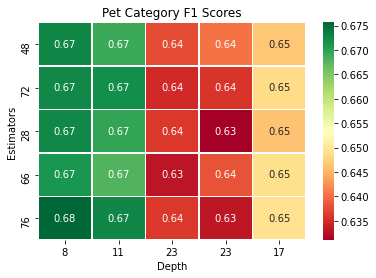

In [40]:
#credits: https://stackoverflow.com/a/29528483/12991246

x1 = np.reshape(pet_scores, (5, 5)).T

cols= depth
idx = estimators
df1 = pd.DataFrame(x1, index=idx, columns=cols)

sns.heatmap(df1, cmap='RdYlGn', linewidths=0.5, annot=True)
plt.xlabel('Depth')
plt.ylabel('Estimators')
plt.title('Pet Category F1 Scores')

plt.show()

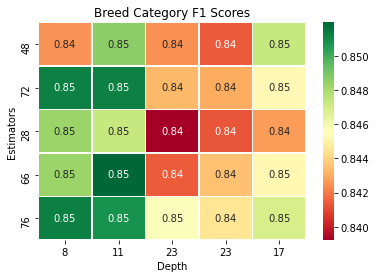

In [43]:
#credits: https://stackoverflow.com/a/29528483/12991246

x2 = np.reshape(breed_scores, (5, 5)).T

cols= depth
idx = estimators
df2 = pd.DataFrame(x2, index=idx, columns=cols)

sns.heatmap(df2, cmap='RdYlGn', linewidths=0.5, annot=True)
plt.xlabel('Depth')
plt.ylabel('Estimators')
plt.title('Breed Category F1 Scores')

plt.show()

### Selecting the best model

In [44]:
pet_model = RandomForestClassifier(max_depth=8, n_estimators=76)
breed_model = RandomForestClassifier(max_depth=11, n_estimators=72)

In [46]:
pet_model.fit(x_train_pet, y_train_pet)
breed_model.fit(x_train_breed, y_train_breed)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=11, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=72,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Predicting the output

In [50]:
pet_predict = pet_model.predict(dummy_test)

In [51]:
breed_predict = breed_model.predict(dummy_test)

In [49]:
test_data_new = pd.read_csv('test.csv')

In [52]:
submission = pd.DataFrame({
            'pet_id': test_data_new['pet_id'],
            'breed_category': breed_predict,
            'pet_category': pet_predict
})

### Writing results to csv file

In [53]:
submission.to_csv('submission.csv', index=False)